# Метод ближайших соседей

## Импорт библиотек, установка константных значений

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from matplotlib import pyplot as plt 

In [ ]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

## Практика

Применим KNN к датасету с изображениями цифр. Это данные для 10-классовой классификации.

Загрузим данные и посмотрим на них.

In [ ]:
data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

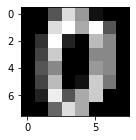

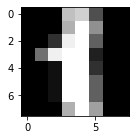

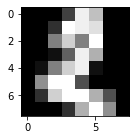

In [ ]:
for i in range(3):
  plt.figure(figsize=(2,2))
  plt.imshow(X[i], cmap='gray')
  plt.show()

Каждая картинка - это матрица чисел (яркостей пикселей). Но в стандартной постановке задач каждый объект (картинка) - это строчка своих признаков в матрице объект-признак. Поэтому вытянем каждую картинку в вектор.

In [ ]:
X = X.reshape(X.shape[0], -1)

Перемешаем данные, так как в исходном датасете числа идут друг за другом, а нам для обучения и тестирования модели нужен случайный порядок.

In [ ]:
X, y = shuffle(X, y)

print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [6 6 6 7 7 3 4 2 1 3]


Разобъем данные на трейн и тест.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size=TRAIN_SIZE,
                                                random_state=RANDOM_STATE)

Обучим KNN с взятым из головы числом соседей (10).

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(Xtrain, ytrain)
prediction = clf.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, prediction)

0.9796296296296296

Посмотрим, как число соседей влияет на качество модели.

In [ ]:
for k in np.arange(3, 20, 3):
    clf = KNeighborsClassifier(n_neighbors=k)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('k:', k)
    print('accuracy:', accuracy_score(ytest, prediction))

k: 3
accuracy: 0.9851851851851852
k: 6
accuracy: 0.9796296296296296
k: 9
accuracy: 0.9814814814814815
k: 12
accuracy: 0.9777777777777777
k: 15
accuracy: 0.975925925925926
k: 18
accuracy: 0.9722222222222222


Посмотрим, как влияет на качество алгоритма способ учесть веса у ближайших соседей.

In [ ]:
for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=3, weights=weights)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('weights:', weights)
    print('accuracy:', accuracy_score(ytest, prediction))

weights: uniform
accuracy: 0.9851851851851852
weights: distance
accuracy: 0.987037037037037


Визуально оценим качество предсказаний

predicted label: 6


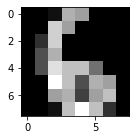

predicted label: 8


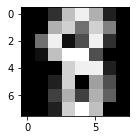

predicted label: 2


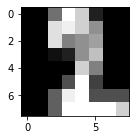

predicted label: 9


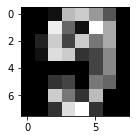

predicted label: 1


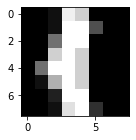

In [ ]:
for i in range(5):
  print('predicted label:', prediction[i])
  plt.figure(figsize=(2,2))
  plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
  plt.show()

Мы видим, что KNN довольно хорошо справился с задачей!  
Подбор гиперпараметров (число соседей, способ подсчета весов соседей и другие) также влияет на качество предсказания модели.